In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import AEMpy library
import aempy

# Import Extra libraries
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json, datetime
import seaborn as sns

In [3]:
system = aempy.System()

In [4]:
errorlogs = system.log_error()

Request: http://localhost:4502/system/console/slinglog/tailer.txt?tail=10000&grep=*&name=/logs/error.log


In [5]:
# There is a builtin parsing in AEMpy to automatically convert logs to pandas dataframe
dfErrors = system.log_to_pandas(errorlogs)

In [6]:
dfErrors["level"].unique()

array(['INFO', 'WARN', 'ERROR'], dtype=object)

In [7]:
df_freq = pd.concat([dfErrors["date"], dfErrors["level"]], axis=1, keys=['date', 'level'])

In [8]:
df_freq['date'] = df_freq['date'].dt.floor('S')

In [9]:
df_freq

,date,level
0,2020-08-27 15:08:22,INFO
1,2020-08-27 15:08:23,INFO
2,2020-08-27 15:08:23,INFO
3,2020-08-27 15:08:23,INFO
4,2020-08-27 15:08:23,INFO
...,...,...
9994,2020-08-27 18:19:25,INFO
9995,2020-08-27 18:19:25,INFO
9996,2020-08-27 18:19:25,INFO
9997,2020-08-27 18:20:08,ERROR


In [58]:
date_after = datetime.datetime(2020,8,27, 16,0,0)

In [59]:
df_after16 = df_freq[df_freq["date"] > date_after]

In [72]:
df_ERROR = df_freq[df_freq["level"] == "WARN"]

In [73]:
t = (df_ERROR.assign(counter = 1)
     .set_index('date')
     .groupby([pd.Grouper(freq='1min'), 'level']).sum()
     .squeeze()
     .unstack())

<AxesSubplot:xlabel='date'>

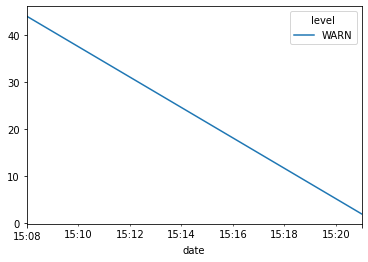

In [74]:
t.plot()

In [41]:
ds_grouped = df_freq.groupby(['date','level'])['level'].count().unstack()
#df_grouped.reset_index(inplace=True)
ds_grouped

level,ERROR,INFO,WARN
date,,,
2020-08-27 15:08:22,NaN,1.0,NaN
2020-08-27 15:08:23,NaN,146.0,NaN
2020-08-27 15:08:24,NaN,408.0,1.0
2020-08-27 15:08:25,NaN,368.0,NaN
2020-08-27 15:08:26,NaN,5.0,NaN
...,...,...,...
2020-08-27 18:19:08,1.0,NaN,NaN
2020-08-27 18:19:21,NaN,1.0,NaN
2020-08-27 18:19:25,NaN,5.0,NaN


In [47]:
df_grouped.iloc[0]

level    1
Name: (2020-08-27 15:08:22, INFO), dtype: int64

In [15]:
df_grouped.fillna(method="backfill")

level
date                level       
2020-08-27 15:08:22 INFO       1
2020-08-27 15:08:23 INFO     146
2020-08-27 15:08:24 INFO     408
                    WARN       1
2020-08-27 15:08:25 INFO     368
...                          ...
2020-08-27 18:19:08 ERROR      1
2020-08-27 18:19:21 INFO       1
2020-08-27 18:19:25 INFO       5
2020-08-27 18:20:08 ERROR      1
2020-08-27 18:20:21 INFO       1

[545 rows x 1 columns]

In [27]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 545 entries, (Timestamp('2020-08-27 15:08:22'), 'INFO') to (Timestamp('2020-08-27 18:20:21'), 'INFO')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   level   545 non-null    int64
dtypes: int64(1)
memory usage: 10.1+ KB


In [31]:
df_new = pd.DataFrame(df_grouped, columns=['date', 'level', 'count'])

In [32]:
df_new

date  level  count
date                level                    
2020-08-27 15:08:22 INFO    NaN      1    NaN
2020-08-27 15:08:23 INFO    NaN    146    NaN
2020-08-27 15:08:24 INFO    NaN    408    NaN
                    WARN    NaN      1    NaN
2020-08-27 15:08:25 INFO    NaN    368    NaN
...                         ...    ...    ...
2020-08-27 18:19:08 ERROR   NaN      1    NaN
2020-08-27 18:19:21 INFO    NaN      1    NaN
2020-08-27 18:19:25 INFO    NaN      5    NaN
2020-08-27 18:20:08 ERROR   NaN      1    NaN
2020-08-27 18:20:21 INFO    NaN      1    NaN

[545 rows x 3 columns]

In [37]:
sns.lineplot(x='level', 
             y=['INFO'],
             hue='count', 
             palette=['b','r'],
             data=df_grouped)

ValueError: array length 1 does not match index length 545

In [ ]:
df_ERROR = dfErrors[dfErrors["level"] == "ERROR"]

In [ ]:
df_INFO = dfErrors[dfErrors["level"] == "INFO"]

In [ ]:
df_WARN = dfErrors[dfErrors["level"] == "WARN"]

In [ ]:
grouped = dfErrors.groupby('level')
grouped.head()

In [ ]:
s = dfErrors['date']
#df_logs_mins = s.groupby(s.dt.floor('H')).size().reset_index(name='count')
df_logs_mins = dfErrors.groupby(["level",s.dt.floor('min')]).size().reset_index(name='count')

In [ ]:
df_logs_mins.head()

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="date", y="count", hue="level", data=dfErrors)
ax.set_title('Logs per hour')
ax.set_xlabel('Hours')
ax.set_ylabel('Nb of logs')

In [ ]:
df1=df[:5]
df_logs_mins.plot('count',['date'],kind = 'bar')

In [ ]:
df_logs_mins.plot(grid=True)

In [ ]:
ax = df_logs_mins.plot()
ax.grid('on', which='minor', axis='x' )
ax.grid('off', which='major', axis='x' )
plt.legend(["Nb of logs"], loc="upper left")
plt.show()

In [ ]:
sns.lineplot(data=dfErrors, x='date', y='Level')

## 